# Predicting heart disease using machine learning

This notebook looks into using various Python_based Machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1.Problem Definition
2.Data
3.Evaluation
4.Features
5.Modeling
6.Experimentation


# 1. Problem Definition

In a statement,
> Given clinical parameters about a patient ,can we predict whether the patient has heart disease or not

# 2. Data
The original data is from the Kaggle or UCI in web .

# 3.Evaluation
> if we can reach at least 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept,we'll pursue the project.

# 4. Features
>It is in the CSV file itself.

## Preparing the tools
We are going to use pandas,matplotlib,Numpy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (EDA)
The goal here is to find more about data and become a subject matter expert on the dataset

1.What are we trying to solve?
2.What kind of data do we have ?
3.What's missing drom the data and how do you deal with it?
4.Where are the outliers and why should we care about them?
5.How can you add,change or remove features to get more out of the data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

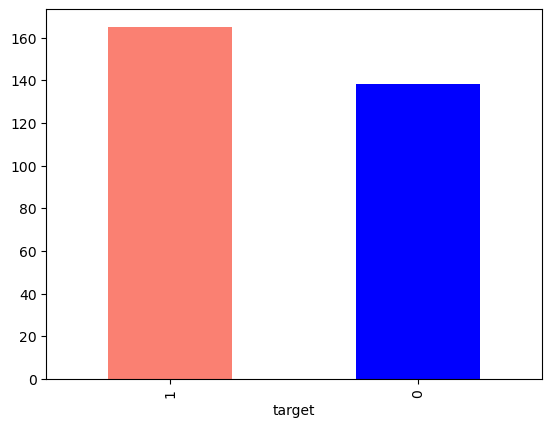

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","blue"]);
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
## Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


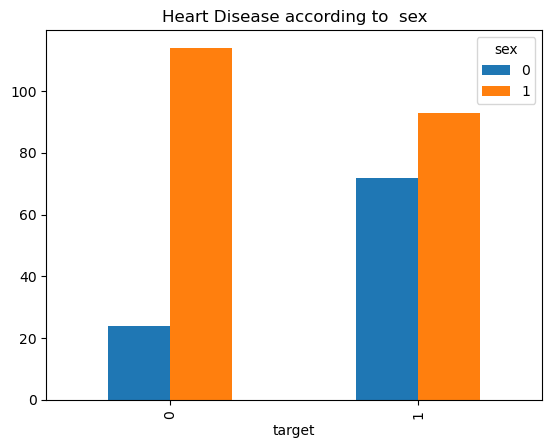

In [12]:
## Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar")
plt.title("Heart Disease according to  sex")
plt.show()

In [13]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

###### Age vs max heart Rate for Heart Disease

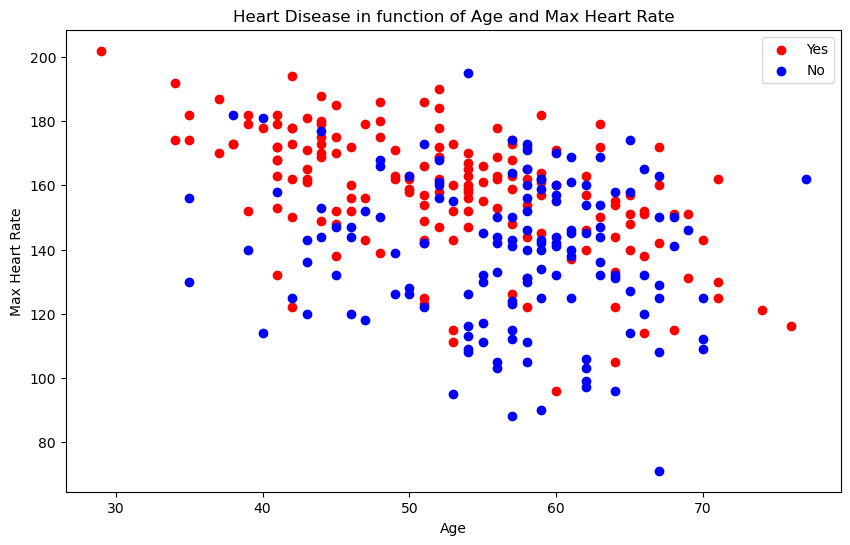

In [14]:
plt.figure(figsize=(10,6))

##Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="red")

##Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c="blue")
##Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Yes","No"])
plt.show()

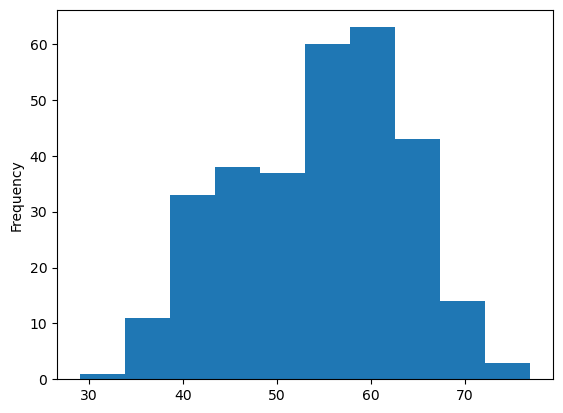

In [15]:
df.age.plot.hist();
plt.show()

#### Heart Disease Frequecny of Chest Pain

> 0.Typical angina
> 1.Atypical angina
> 2.Non-anginal pain
> 3.Asymptomatic

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


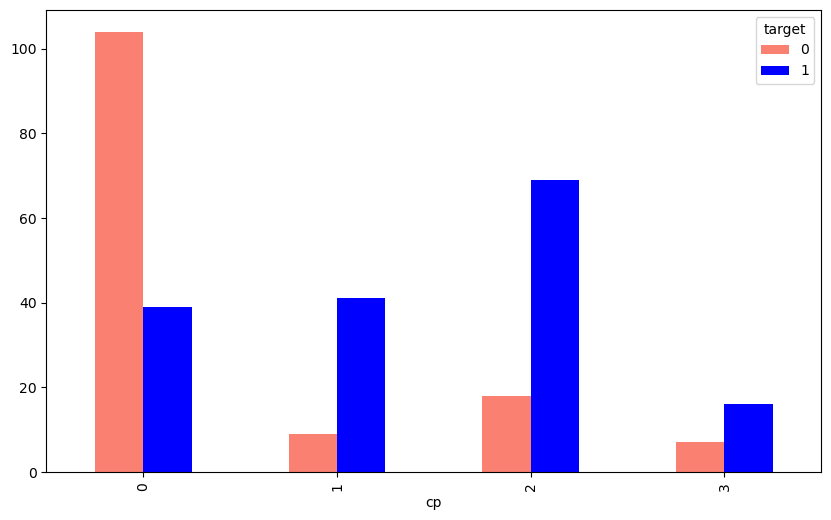

In [17]:
## Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","blue"])
plt.show()

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
## Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


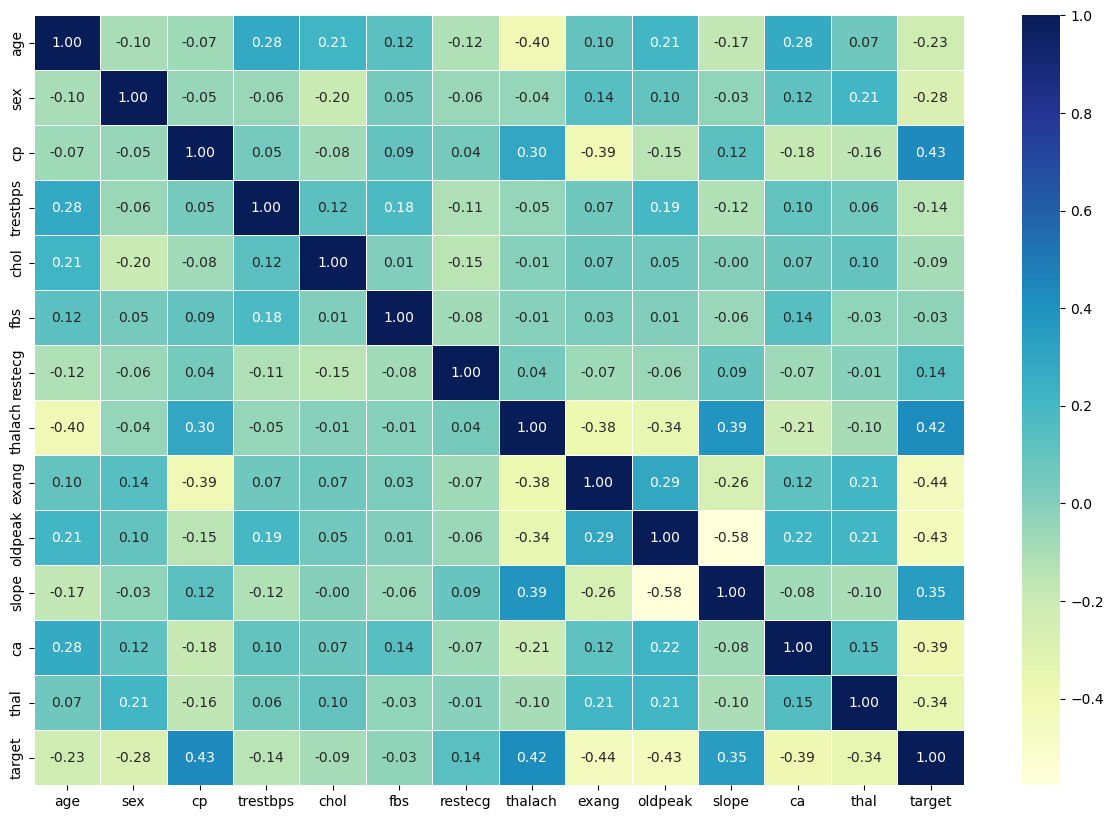

In [20]:
## Let's make our correlation matrix a little more visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")
plt.show()

## 5.0 Modeling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
## Splitting the data into X and y
X=df.drop("target",axis=1)
y=df.target

In [23]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
## Splitting the data into train and test sets

np.random.seed(10)

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)



In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


Now we have got our data into train and test sets,it is time to build a ml model



trying 3 different ml models
1.Logistic Regression
2.KNN Classifier
3.RFC

In [27]:
## Put models in a dict
models={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest Classifier":RandomForestClassifier()}

##Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates the machine learning models.
    Based on the already defined dict and the data.

    """
    np.random.seed(10)
    model_scores={}
    ##Loop through models
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)

    return model_scores

In [28]:
model_scores=fit_and_score(models,
              X_train,
              X_test,
              y_train,
              y_test)
model_scores

C:\Users\kshit\Desktop\ML_Project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest Classifier': 0.8032786885245902}

## Model Comparison

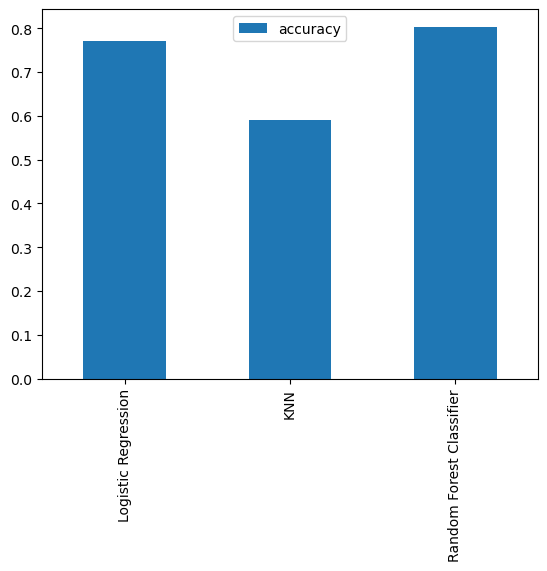

In [29]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

Now we have got a baselinem model,now we are tuning the hyperparameters to make the model more useful

#### We are doing:
* Hyperparameter Tuning
* Feature importance
* Confusion matrix
* Cross_validation
* Precision
* Recall
* F1_Score
* Classification Report
* ROC curve
* Area under the ROC curve

#### Hyperparameter Tuning

In [30]:
train_scores=[]
test_scores=[]


##Create a list of different values for KNN
neighbours=range(1,21)

##Setup KNN
knn=KNeighborsClassifier()

##Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)

    ##Fit the algorithm
    knn.fit(X_train,y_train)

    ##Update the train_scores list
    train_scores.append(knn.score(X_train,y_train))

    ##Update the test_scores list
    test_scores.append(knn.score(X_test,y_test))

train_scores

[1.0,
 0.8181818181818182,
 0.8099173553719008,
 0.7603305785123967,
 0.78099173553719,
 0.7520661157024794,
 0.7396694214876033,
 0.7520661157024794,
 0.7355371900826446,
 0.7231404958677686,
 0.7066115702479339,
 0.7231404958677686,
 0.7107438016528925,
 0.7024793388429752,
 0.7024793388429752,
 0.6983471074380165,
 0.7066115702479339,
 0.6859504132231405,
 0.731404958677686,
 0.731404958677686]

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
test_scores

[0.5901639344262295,
 0.6557377049180327,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.7377049180327869,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853]

maximun KNN score on the test data:73.77049180327869%


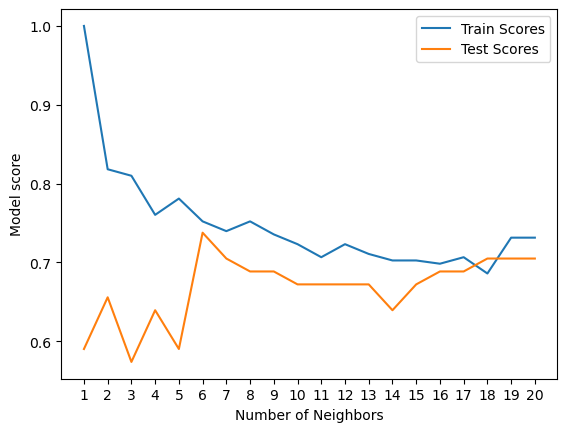

In [36]:
plt.plot(neighbours,train_scores,label="Train Scores")
plt.plot(neighbours,test_scores,label="Test Scores")
plt.xlabel("Number of Neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model score")
plt.legend()

print(f"maximun KNN score on the test data:{max(test_scores)*100}%")
plt.show()

#### Even with the hyperparameter tuning,KNN's score is far below the other models.

## Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
## Create a hyperparameter grid for LogisticRegression

In [54]:
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]}


##Create Hyperparameter grid for Classsifier
rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

We have setup the grid,let's tune them using RandSearchCV

In [45]:
np.random.seed(20)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

## Fit the model
rs_log_reg.fit(X_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [49]:
rs_log_reg

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [50]:
rs_log_reg.score(X_test,y_test)

0.7704918032786885

In [55]:
## Now we tune Logsitic regression.Let's dp the same for classifier
np.random.seed(10)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [56]:
rs_rf.score(X_test,y_test)

0.7868852459016393

In [57]:
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [58]:
model_scores


{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest Classifier': 0.8032786885245902}

1.by hand
2.RandomizedSearchCV
3.GridSearchCV

### Tuning hyperparameter using GridSearchCV

since the logisticregression model provides the best score so far ,we"ll try and improve them using GridSearchCV

In [61]:
log_reg_grid={
    "C":np.logspace(-4,4,30),
    "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

## Fit the model
gs_fit=gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [62]:
gs_fit.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [63]:
gs_fit.score(X_test,y_test)

0.7704918032786885

In [64]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest Classifier': 0.8032786885245902}

#### As of now,we're sticking with logistic regression model

## Evaluating our tuned machine learning model,beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

In [65]:
## Make prediction with tuned model
y_preds=gs_log_reg.predict(X_test)

In [66]:
y_preds

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [67]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: target, Length: 61, dtype: int64

In [70]:
## Plot the ROC curve anc calculate AUC metric
from sklearn.metrics import plot_roc_curve 
plot_roc_curve(gs_log_reg,X,y)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\kshit\Desktop\ML_Project_1\env\Lib\site-packages\sklearn\metrics\__init__.py)

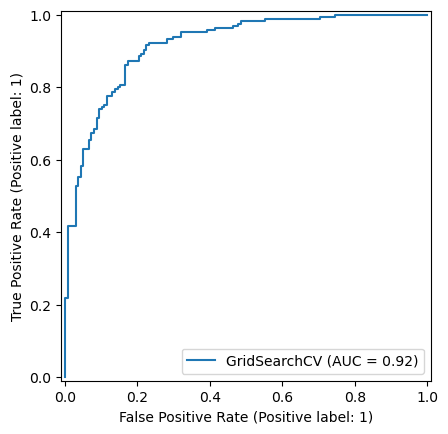

In [73]:
from sklearn.metrics import RocCurveDisplay

# Assuming gs_log_reg is your trained model, X and y are your data
RocCurveDisplay.from_estimator(gs_log_reg, X, y)
plt.show()


In [74]:
## Confusion mattix
print(confusion_matrix(y_test,y_preds))

[[26  9]
 [ 5 21]]


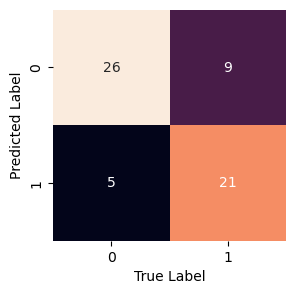

In [78]:
def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using Seaborn's heatmap()
    
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,cbar=False)

    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test,y_preds)
plt.show()

Now w ehave got a roc and confusion matrix,let's get the classification report as well as 
cross validated precision,recall and f1 score

In [79]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



The above report is done only in one set of data i.e it is not cross validated. 

#### Calculate evaluation metrics using cross-validation


In [80]:
# check best hyperparamters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [84]:
## Create a new classifier with best params
clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [85]:
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [87]:
cv_acc=np.mean(cv_acc)

In [88]:
cv_precisionc=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precisionc

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [89]:
np.mean(cv_precisionc)

0.8207936507936507

In [90]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [91]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

### Feature Importance
* it is the another way of asking "which feature contributed most to the outcomes of the model and how did they contribute?"
* Finding feature importance is different for each machine learning model
* Let's find the same for our logisticRegression model...
  


In [100]:
gs_log_reg.best_params_

clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [101]:
## Check coef_
clf.coef_

array([[ 0.00715372, -0.97803193,  0.68014109, -0.01801818, -0.00464546,
        -0.05042032,  0.17402867,  0.03092568, -0.48188293, -0.32960514,
         0.43133356, -0.78562594, -0.42131801]])

the length is the same as of the main columns in the original dataset

In [106]:
 ##  Match the features to the columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict
## This gives the idea of how much each column are contrubuting to the target column 
## while modeling the dataset

{'age': 0.007153717404182771,
 'sex': -0.9780319299158091,
 'cp': 0.6801410857972505,
 'trestbps': -0.018018176675591857,
 'chol': -0.0046454622715789845,
 'fbs': -0.05042031927443354,
 'restecg': 0.1740286678821324,
 'thalach': 0.03092567606006002,
 'exang': -0.4818829310384012,
 'oldpeak': -0.32960514401320135,
 'slope': 0.43133355719130306,
 'ca': -0.7856259356772689,
 'thal': -0.42131800885459636}

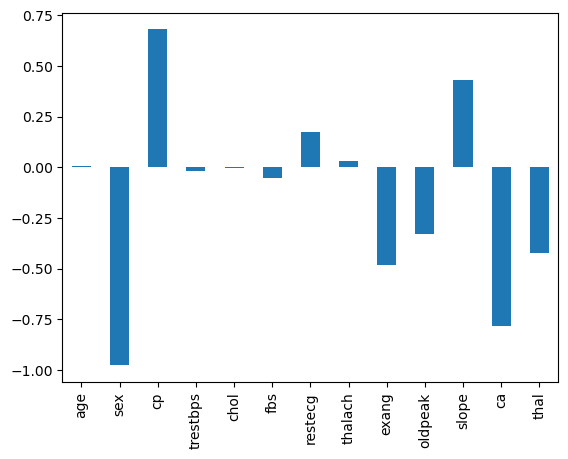

In [108]:
## visualize feaeture importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(legend=False);
plt.show()

## 6.Experimentation 

Everything we have done is experimentation